<a href="https://colab.research.google.com/github/bhatiaparteek/ml_with_python/blob/main/Chapter_13_Clustering/chapter_13_clustering_implementation_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study 1: - Mall-Customer

Importing the Libraries

In [2]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Loading the dataset

In [6]:
from google.colab import files

# Upload the file from your local system
uploaded = files.upload()
#select MallCustomerDataset.csv to load

Saving MallCustomerDataset.csv to MallCustomerDataset.csv


In [8]:
#Importing the dataset
dataset = pd.read_csv('MallCustomerDataset.csv')
X = dataset.iloc[:, [3, 4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Using the elbow method to find the optimal number of clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

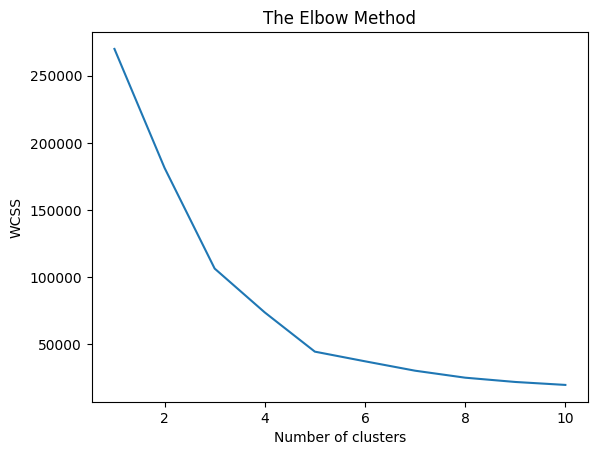

In [10]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# Generation of elbow graph
plt.plot(range (1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Fitting K-Means to the dataset

In [12]:
# Fitting K-Means to the dataset with 5 clusters
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Visualizing the clusters

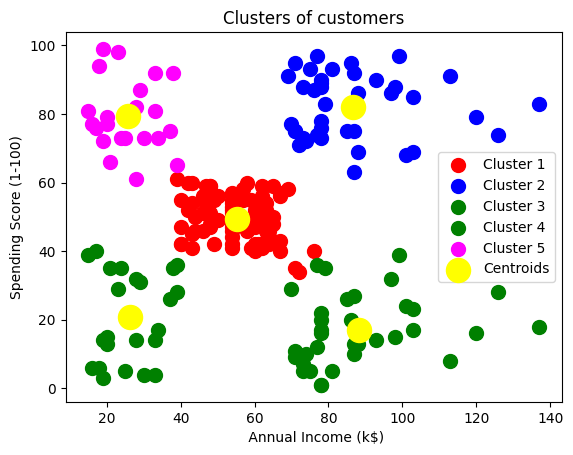

In [13]:
# Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0] , X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0] , X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0] , X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0] , X[y_kmeans == 3, 1], s = 100, c = 'green', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0] , X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300,c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel(' Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


Using the dendrogram to find the optimal number of clusters

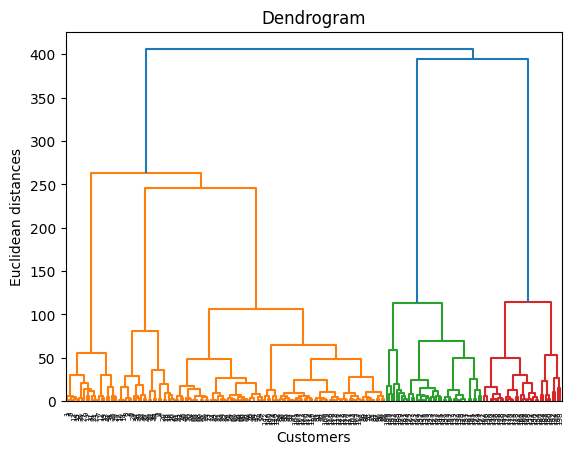

In [14]:
#Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram_obj = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Training the Hierarchical Clustering model on the dataset

In [15]:
#Training the Hierarchical Clustering model on the dataset with 5 clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering (n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
print(y_hc)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Visualizing the clusters

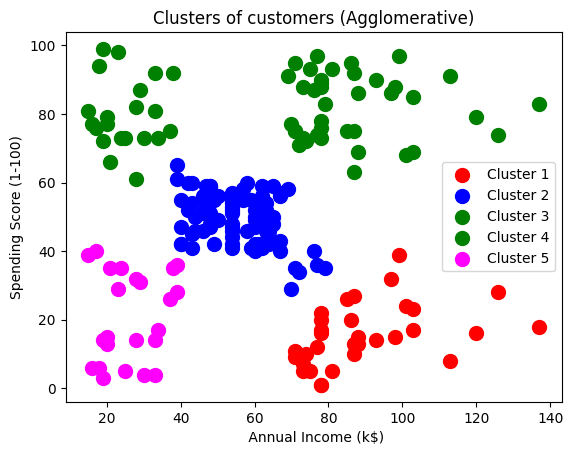

In [16]:
# Visualizing the clusters
plt.scatter(X[y_hc == 0, 0] , X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0] , X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0] , X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0] , X[y_hc == 3, 1], s = 100, c = 'green', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0] , X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers (Agglomerative)')
plt.xlabel(' Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Visualizing the clusters with centroids

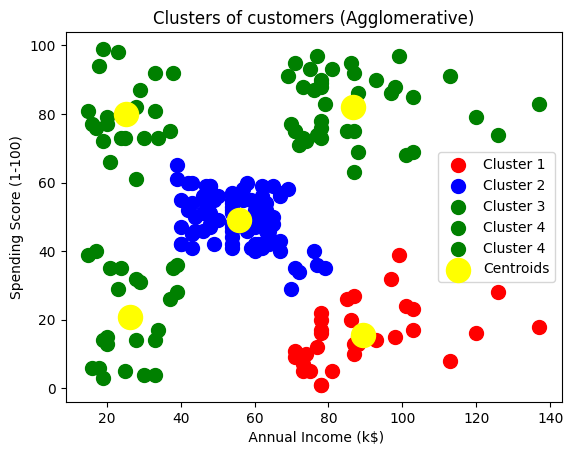

In [19]:
# Fitting the model
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(X, y_hc)

# Visualizing the clusters with centroids
plt.scatter(X[y_hc == 0, 0] , X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0] , X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0] , X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0] , X[y_hc == 3, 1], s = 100, c = 'green', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0] , X[y_hc == 4, 1], s = 100, c = 'green', label = 'Cluster 4')
plt.scatter(clf.centroids_[:, 0], clf.centroids_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers (Agglomerative)')
plt.xlabel(' Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Case Study 2: - US-Arrests

Importing the Libraries

In [20]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Loading the dataset

In [21]:
from google.colab import files

# Upload the file from your local system
uploaded = files.upload()
#select USArrests.csv to load

Saving USArrests.csv to USArrests.csv


In [22]:
#Importing the dataset
dataset = pd.read_csv('USArrests.csv')
X = dataset.iloc[:,1: 5].values
print(X)

[[ 13.2 236.   58.   21.2]
 [ 10.  263.   48.   44.5]
 [  8.1 294.   80.   31. ]
 [  8.8 190.   50.   19.5]
 [  9.  276.   91.   40.6]
 [  7.9 204.   78.   38.7]
 [  3.3 110.   77.   11.1]
 [  5.9 238.   72.   15.8]
 [ 15.4 335.   80.   31.9]
 [ 17.4 211.   60.   25.8]
 [  5.3  46.   83.   20.2]
 [  2.6 120.   54.   14.2]
 [ 10.4 249.   83.   24. ]
 [  7.2 113.   65.   21. ]
 [  2.2  56.   57.   11.3]
 [  6.  115.   66.   18. ]
 [  9.7 109.   52.   16.3]
 [ 15.4 249.   66.   22.2]
 [  2.1  83.   51.    7.8]
 [ 11.3 300.   67.   27.8]
 [  4.4 149.   85.   16.3]
 [ 12.1 255.   74.   35.1]
 [  2.7  72.   66.   14.9]
 [ 16.1 259.   44.   17.1]
 [  9.  178.   70.   28.2]
 [  6.  109.   53.   16.4]
 [  4.3 102.   62.   16.5]
 [ 12.2 252.   81.   46. ]
 [  2.1  57.   56.    9.5]
 [  7.4 159.   89.   18.8]
 [ 11.4 285.   70.   32.1]
 [ 11.1 254.   86.   26.1]
 [ 13.  337.   45.   16.1]
 [  0.8  45.   44.    7.3]
 [  7.3 120.   75.   21.4]
 [  6.6 151.   68.   20. ]
 [  4.9 159.   67.   29.3]
 

Using the elbow method to find the optimal number of clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

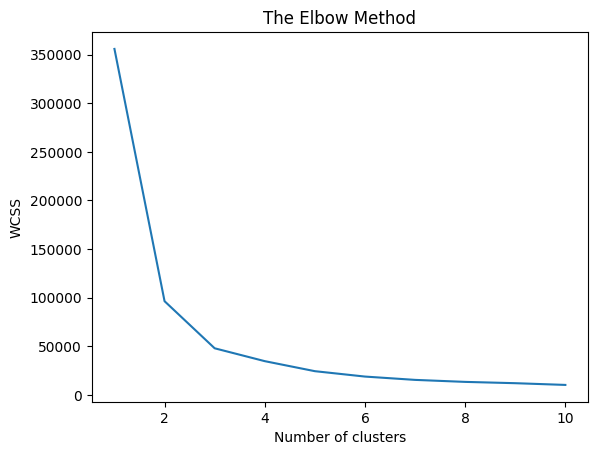

In [23]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range (1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Fitting K-Means to the dataset

In [25]:
# Fitting K-Means to the dataset with 3 clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[2 2 2 0 2 0 1 2 2 0 1 1 2 1 1 1 1 2 1 2 0 2 1 2 0 1 1 2 1 0 2 2 2 1 1 0 0
 1 0 2 1 0 0 1 1 0 0 1 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Visualizing the clusters

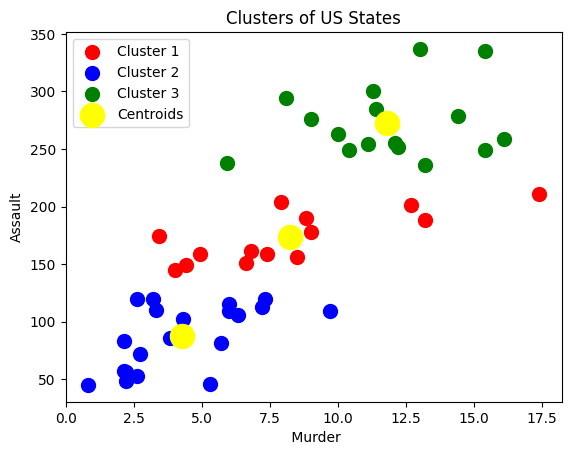

In [26]:
# Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0] , X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0] , X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0] , X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300,	c = 'yellow', label = 'Centroids')
plt.title('Clusters of US States')
plt.xlabel(' Murder')
plt.ylabel('Assault')
plt.legend()
plt.show()

Using the dendrogram to find the optimal number of clusters

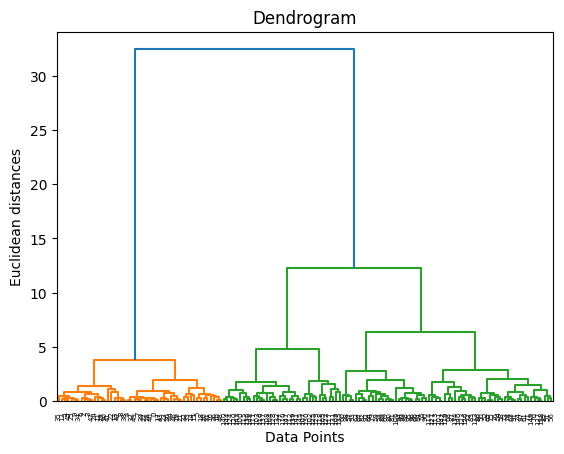

In [42]:
#Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram_obj = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean distances')
plt.show()

Training the Hierarchical Clustering model on the dataset

In [28]:
#Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering (n_clusters = 2, affinity = 'euclidean', 	linkage = 'ward')
y_hc = hc.fit_predict(X)
print(y_hc)

[1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Visualizing the clusters

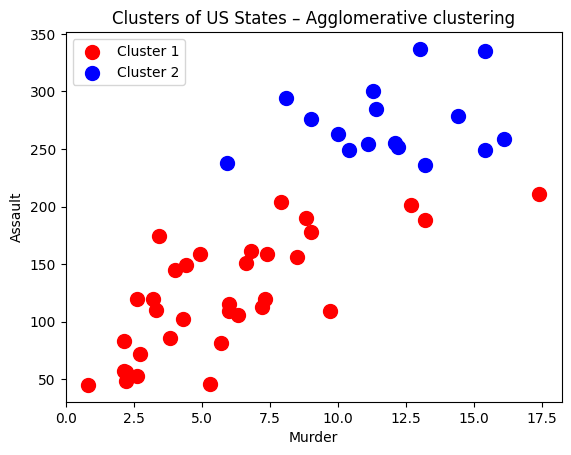

In [29]:
# Visualizing the clusters
plt.scatter(X[y_hc == 0, 0] , X[y_hc == 0, 1], s = 100,  c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0] , X[y_hc == 1, 1], s = 100,  c = 'blue', label = 'Cluster 2')
plt.title('Clusters of US States – Agglomerative clustering')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.legend()
plt.show()


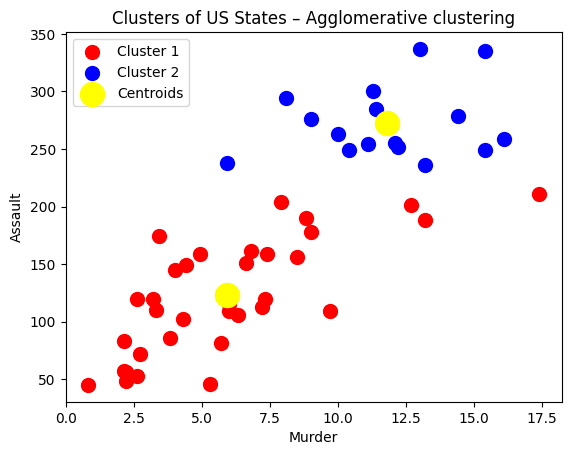

In [30]:
"""Visualizing the clusters with centroids"""
# Creation and fitting of a nearest centroid classifier over the dataset
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(X, y_hc)
# Visualizing the clusters with centroids
plt.scatter(X[y_hc == 0, 0] , X[y_hc == 0, 1], s = 100,
c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0] , X[y_hc == 1, 1], s = 100,
c = 'blue', label = 'Cluster 2')
plt.scatter(clf.centroids_[:, 0], clf.centroids_[:, 1], s =300,
c = 'yellow', label = 'Centroids')
plt.title('Clusters of US States – Agglomerative clustering')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.legend()

# Case Study 3: - IRIS Dataset

Importing the Libraries

In [31]:
#Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Loading the dataset

In [33]:
#Loading the dataset
from sklearn.datasets import load_iris
dataset = load_iris()
X = dataset['data']
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Using the elbow method to find the optimal number of clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

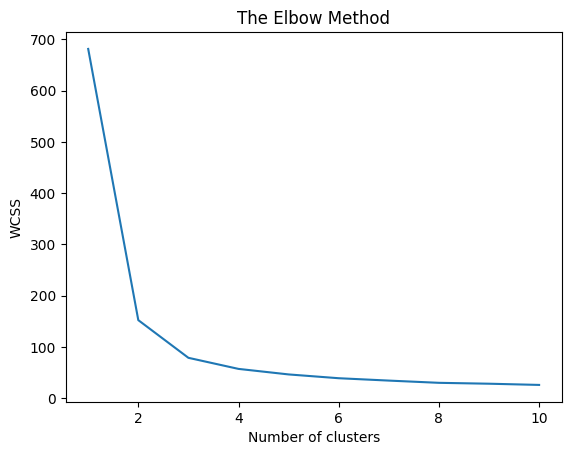

In [34]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',
    random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range (1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Fitting K-Means to the dataset

In [36]:
# Fitting K-Means to the dataset with 3 clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Visualizing the clusters

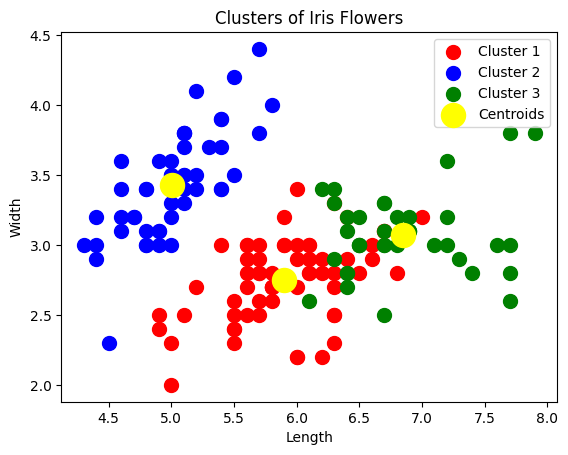

In [39]:
# Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0] , X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0] , X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0] , X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300,	c = 'yellow', label = 'Centroids')
plt.title('Clusters of Iris Flowers')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

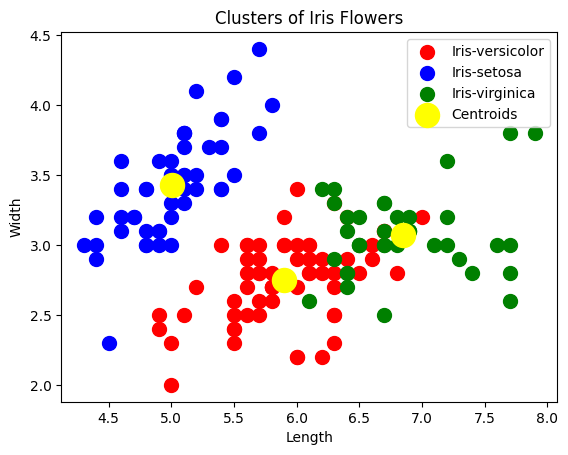

In [41]:
# Visualizing the clusters with their actual names
plt.scatter(X[y_kmeans == 0, 0] , X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-versicolor')
plt.scatter(X[y_kmeans == 1, 0] , X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 2, 0] , X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300,	c = 'yellow', label = 'Centroids')
plt.title('Clusters of Iris Flowers')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()